In [59]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

from matplotlib import rcParams
rcParams['figure.figsize'] = (15, 13)


# Camera calibration

In [83]:
from glob import glob

def calibration_images():
    calibration_image_files = glob('camera_cal/calibration*.jpg')
    for fn in calibration_image_files:
        img = mpimg.imread(fn)
        yield cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        
def find_chessboard_corners(images):
    board_size = (9, 6)
    obj_corners = np.array([[x, y, 0] for y in range(board_size[1]) for x in range(board_size[0])],
                          dtype=np.float32)

    obj_points = []
    image_points = []
    for img in calibration_images():
        ret, corners = cv2.findChessboardCorners(img, board_size, None)
        if ret: 
            obj_points.append(obj_corners)
            image_points.append(corners)
    
    return (obj_points, image_points)

def calibrate_camera(obj_points, image_points):
    calibration_image_size = (720, 1280)
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(
        obj_points, image_points, calibration_image_size, None, None)
        
    if ret: 
        return (mtx, dist)
    else:
        raise "Unable to calibrate camera"

def undistort_image(img, mtx, dist):
    return cv2.undistort(img, mtx, dist, None, mtx)


In [86]:
obj_points, image_points = find_chessboard_corners(calibration_images())
mtx, dist = calibrate_camera(obj_points, image_points)

# Testing calibration

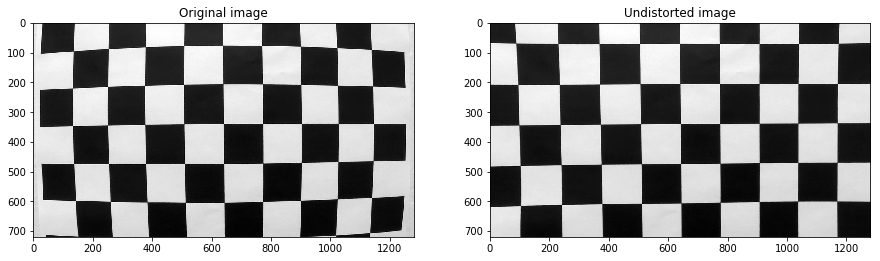

In [88]:
test_image = next(calibration_images())
undistorted_image = undistort_image(test_image, mtx, dist)
fig, axes = plt.subplots(1, 2)

axes[0].imshow(test_image, 'gray')
axes[0].set_title('Original image')

axes[1].imshow(undistorted_image, 'gray')
axes[1].set_title('Undistorted image')

fig.savefig('output/calibration_test.png');